<a href="https://colab.research.google.com/github/rohitkanteti/Mini-Project/blob/main/Minor_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [2]:
target = []
images = []
flat_data = []

datadir = "/content/drive/MyDrive/SMARTKNOWER-ML/MLSessions/datasets/MinorProjectDataSet"
categories = ['airplane','fruit','dog']

for category in categories:
  class_num = categories.index(category) #Label encoding
  path = os.path.join(datadir,category)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    # plt.imshow(img_array)
    # break
    img_resized = resize(img_array,(150,150,3))#resize
    flat_data.append(img_resized.flatten())#flatten
    images.append(img_resized)
    target.append(class_num)
flat_data =np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [3]:
flat_data

array([[0.7072617 , 0.78991843, 0.83988601, ..., 0.51439216, 0.49188235,
        0.38992157],
       [0.2396183 , 0.28275556, 0.22785359, ..., 0.50885961, 0.46729255,
        0.38886118],
       [0.79875817, 0.65379342, 0.4184993 , ..., 0.84187442, 0.61568627,
        0.38655159],
       ...,
       [0.31960784, 0.25686275, 0.18381699, ..., 0.23360784, 0.2158366 ,
        0.23005882],
       [0.80738998, 0.72895861, 0.59841307, ..., 0.52510588, 0.51897865,
        0.33074336],
       [0.29155904, 0.29639564, 0.24057865, ..., 0.29208192, 0.26763747,
        0.28423878]])

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<BarContainer object of 3 artists>

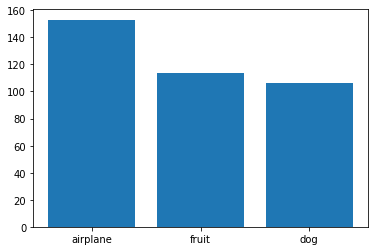

In [5]:
unique,count = np.unique(target,return_counts=True)
plt.bar(categories,count)

In [6]:
 #split data into training and testing
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state=0)


In [7]:
#Hyper Parameter Tuning and using Support Vector Machine
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'C':[0.1,1,10,100],
              'kernel':['linear','rbf']}
svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param_grid)


In [8]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
y_pred = grid.predict(x_test)
y_pred

array([0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1])

In [15]:
y_test

array([0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1,
       0, 1])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
accuracy_score(y_pred,y_test)

0.9642857142857143

In [24]:
confusion_matrix(y_pred,y_test)

array([[47,  0,  3],
       [ 0, 37,  0],
       [ 1,  0, 24]])

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       1.00      1.00      1.00        37
           2       0.89      0.96      0.92        25

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



In [52]:
#Testing with New Data
flat_data1 = []

datadir1 = "/content/drive/MyDrive/SMARTKNOWER-ML/MLSessions/datasets/MinorProjectDataSet"
categories = ['Test']

for category in categories:
  
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))#resize
    flat_data1.append(img_resized.flatten())#flatten
flat_data1 =np.array(flat_data1)


In [53]:
flat_data1

array([[0.16862745, 0.18823529, 0.10980392, ..., 0.48235294, 0.45490196,
        0.24313725],
       [0.63956863, 0.64722471, 0.6084102 , ..., 0.97238314, 0.85662745,
        0.39167725],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [54]:
grid.predict(flat_data1)

array([0, 2, 1])